<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="45%" align="right" border="4">

# Introduction to Python, IPython & Jupyter

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='http://fpq.io'>http://fpq.io</a> | <a href='mailto:team@tpq.io'>team@tpq.io</a>

## Python Environments

### Anaconda

It is important to have available a **consistent Python distribution** for interactive analytics, prototyping and development. **Anaconda** is one excellent option that is targeted towards

* corporate and financial institutions,
* data scientists,
* quantitative and financial analysts as well as
* academics, researchers, teachers

You can download it here <a href="http://www.continuum.io/downloads" target="_blank">Anaconda page</a>. However, in principle, you do not need to take care of this since there is the Python Quant Platform.

### Quant Platform

Alternatively, you can use the Web-based financial analytics environment **Python Quant Platform** (<a href="http://quant-platform.com" target="_blank">http://quant-platform.com</a>) where you find a **complete, browser-based Python analytics and development environment** with, among others, a full Anaconda Python distribution already installed (both 2.7 and 3.4 versions).

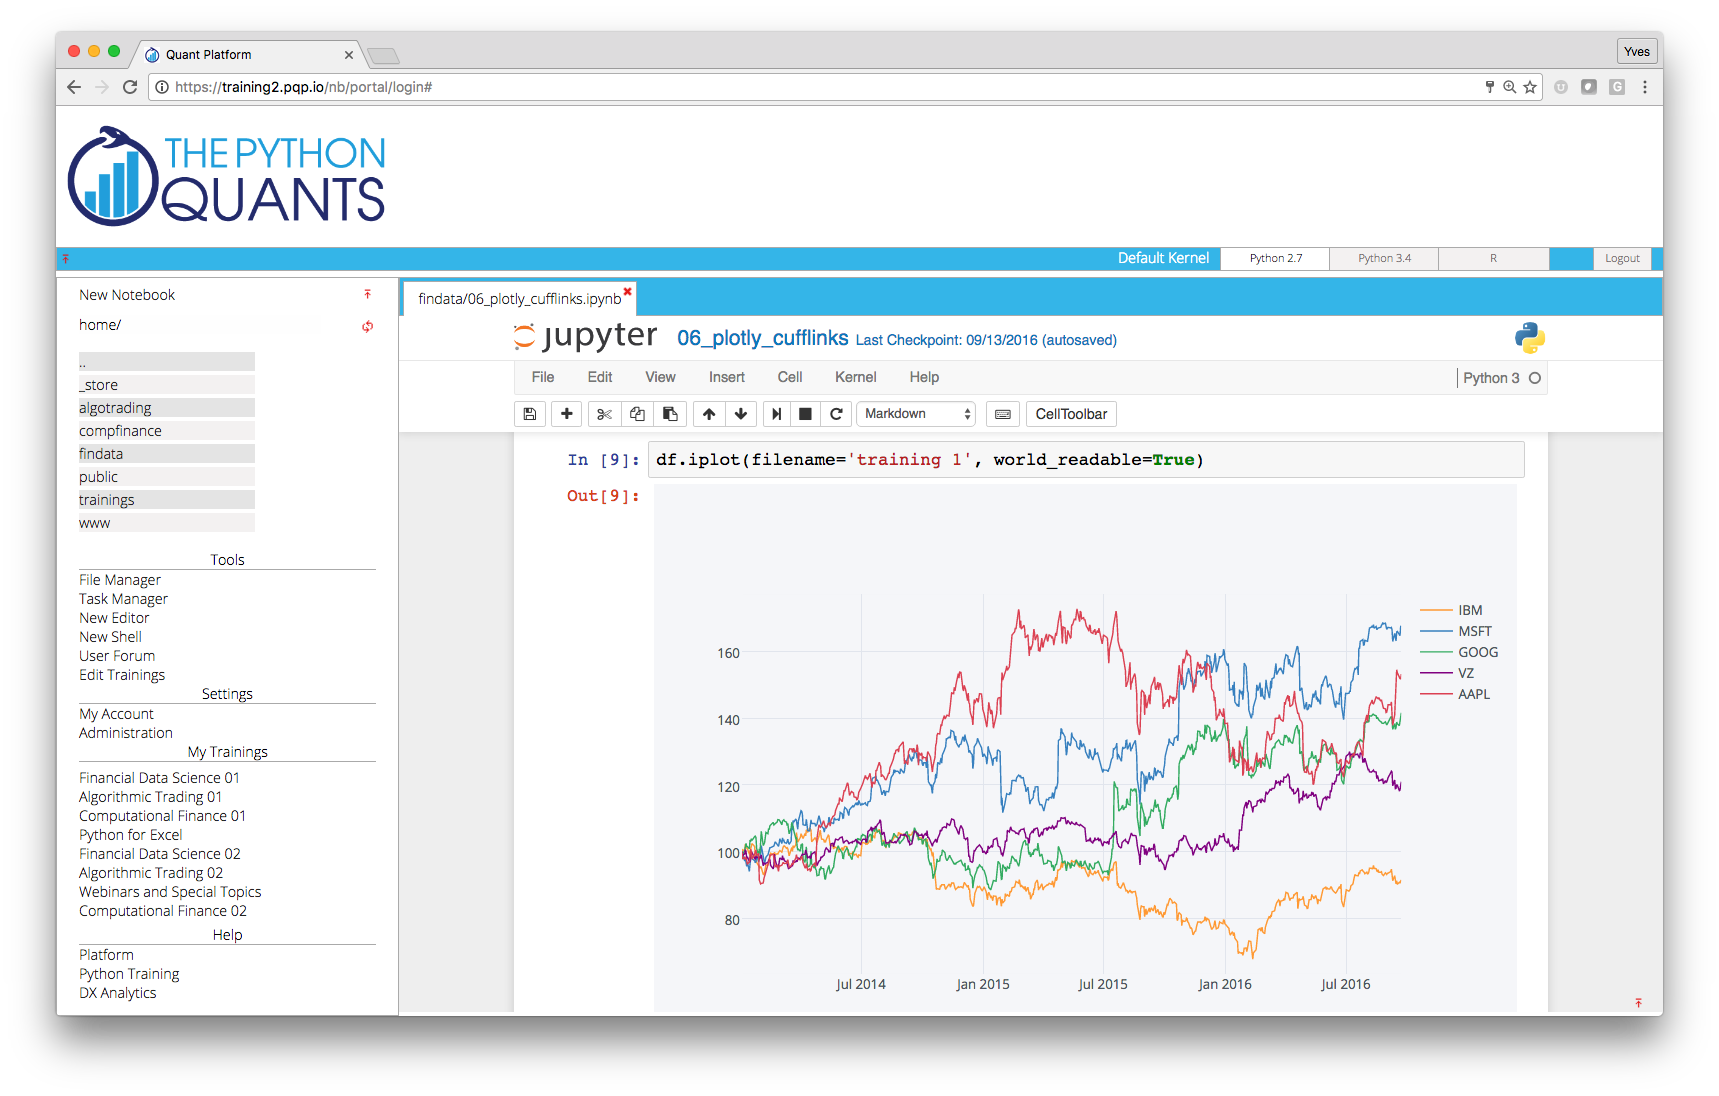

In [1]:
from IPython.display import IFrame, Image, HTML
Image('http://hilpisch.com/pqp_overview.png')

## IPython

IPython is today the most popular and one of the most **powerful interactive analytics environments** for Python and other languages like R. It comes in three **technological flavours**:

* IPython Shell
* IPython QTConsole
* IPython Notebook (now Jupyter Notebook)



Cf. http://ipython.readthedocs.org/en/stable/

On the **Quant Platform**, you can use both the **IPython Shell** and **IPython Notebook** (now **Jupyter Notebook**).

## First Steps with Python

### Using Jupyter Notebook

IPython/Jupyter (Notebook) allows for eaay, fail-safe Python development and interactive analytics. It supports the user with a number of tools:

* magic commands that bring magic to the command line
* help system for fast help access
* tab completion for inspection of available names, attributes and methods
* system shell
* others ...

#### Calculations

On a rather fundamental level, IPython can work as a calculator.

In [ ]:
3 + 4

In [ ]:
3 * 5

In [ ]:
3 / 4 
 # Python 2.x --> result 0
 # Python 3.x --> result 0.75

In [ ]:
3 / 4.

In [ ]:
log(1)

In [ ]:
import math

In [ ]:
math.log(1)

In [ ]:
math.log?
# reading the help text

In [ ]:
math.  # tab completion

#### Magic Commands

Magic commands are IPython specific, some IPython Notebook specific.

In [ ]:
%magic

In [ ]:
%lsmagic

In [ ]:
%prun?
 # get help on a command with ?

In [ ]:
Image('http://matplotlib.org/mpl_examples/pie_and_polar_charts/polar_scatter_demo.hires.png')

In [ ]:
# displaying graphics within the Notebook
%matplotlib inline
# suppressing uncritical warning
import warnings; warnings.simplefilter('ignore')

In [ ]:
%load http://matplotlib.org/mpl_examples/shapes_and_collections/scatter_demo.py

#### System Shell

In [1]:
%run dx_example.py

ERROR:root:File `'dx_example.py'` not found.


In [ ]:
!ls -n

In [ ]:
mkdir test

In [ ]:
ls

In [ ]:
cd test

In [ ]:
cd ..

In [ ]:
rmdir test

In [ ]:
ls

### Interactive Python Coding

#### Deciding Prime Characteristic of Integer

As an exercise, we want to implement a function that decides whether a given integer is prime or not. The function shall check:

* whether the input is indeed an integer
* whether number is both positive and not "too small"
* whether it has the prime characteristic

Let's start with the basic function definition.

In [ ]:
def is_prime(I):
    pass

In [ ]:
is_prime(1)

In [ ]:
is_prime('Python')

Let's add type checking.

In [ ]:
def is_prime(I):
    print("Type of I is %s" % type(I))

In [ ]:
is_prime(1)

In [ ]:
is_prime('Python')

We only accept the 'int' type.

In [ ]:
def is_prime(I):
    if type(I) != int:
        raise TypeError, "Input has not the right type."
    print("Input type is ok.")

In [ ]:
is_prime(1)

In [ ]:
is_prime('Python')

In [ ]:
def is_prime(I):
    if not isinstance(I, int):  # alternative inspection
        raise TypeError, "Input has not the right type."
    print("Input type is ok.")

In [ ]:
is_prime(1)

In [ ]:
is_prime('Python')

We also have to exclude negative and "too small" numbers.

In [ ]:
def is_prime(I):
    if type(I) != int:
        raise TypeError("Input has not the right type.")
    if I <= 3:
        raise ValueError("Number too small.")
    print("Input is ok.")

In [ ]:
is_prime(1)

In [ ]:
is_prime(5)

Finally, we add the functionality to check the prime characteristic.

In [ ]:
def is_prime(I):
    if type(I) != int:
        raise TypeError("Input has not the right type.")
    if I <= 3:
        raise ValueError("Number too small.")
    else:
        for i in xrange(2, I):
            if I % i == 0:
                print("Number is not prime, it is divided by %d." % i)
                break
            if i == I - 1:
                print("Number is prime.")

In [ ]:
is_prime(1)

In [ ]:
is_prime('Python')

In [ ]:
is_prime(5)

In [ ]:
is_prime(6)

In [ ]:
%time is_prime(18000001)

In [ ]:
%time is_prime(int(1e8) + 7)

In [ ]:
%time is_prime(int(1e8) + 3)

If this is too long, we can implement two simple optimizations:

* we only need to check **odd numbers**
* we only need to check numbers up to the **square root of the input number**

In [ ]:
def is_prime(I):
    if type(I) != (int or long):
        raise TypeError("Input has not the right type.")
    if I <= 1:
        raise ValueError("Number too small.")
    else:
        if I % 2 == 0:
            print("Number is even, therefore not prime.")
            return None
        else:
            end = int(I ** 0.5) + 1
            for i in xrange(3, end, 2):
                if I % i == 0:
                    print("Number is not prime, it is divided by %d." % i)
                    break
                if i >= end - 2:
                    print("Number is prime.")

With the **improved algorithm**, Python becomes faster.

In [ ]:
%time is_prime(int(1e8) + 7)

In [ ]:
%time is_prime(int(1e8) + 3)

In [ ]:
p = 100109100129162907  # larger prime
%time is_prime(p)

However, performance can be further enhanced by an even better algorithm.

In [ ]:
def is_prime_2(n):
  if n == 2 or n == 3: return True
  if n < 2 or n % 2 == 0: return False, 2
  if n < 9: return True
  if n % 3 == 0: return False, 3
  r = int(n ** 0.5)
  f = 5
  while f <= r:
    if n % f == 0: return False, f
    if n % (f + 2) == 0: return False, f + 2
    f +=6
  return True

In [ ]:
%time is_prime_2(int(1e8) + 7)

In [ ]:
%time is_prime_2(int(1e8) + 3)

In [ ]:
%time is_prime_2(p)  # about twice as fast as the previous one

In [ ]:
type(range(10))

In [ ]:
type(xrange(10))

In [ ]:
for x in range(10):
    print (x)

In [ ]:
for x in xrange(10):
    print (x)

In [ ]:
import sys

In [ ]:
sys.getsizeof(range(1000))

In [ ]:
sys.getsizeof(xrange(1000))

### Dynamic Compiling

In [ ]:
def is_prime_3(n):
    if n % 2 == 0:
        return False
    from_i = 3
    to_i = n ** 0.5 + 1
    for i in xrange(from_i, int(to_i), 2):
        if n % i == 0:
            return False
    return True

In [ ]:
%time is_prime_3(p)  # pure Python slightly slower

In [ ]:
import numba as nb

In [ ]:
is_prime_nb = nb.jit(is_prime_3)

In [ ]:
%timeit is_prime_nb(p)  # compiled version about 5 times faster

## Modelling Data

### Basic Data Types

#### Integers

In [2]:
a = 10

In [3]:
a

10

In [4]:
type(a)

int

In [5]:
a.bit_length()

4

In [6]:
a = 1000000

In [7]:
a.bit_length()

20

In [8]:
googol = 10 ** 100
googol

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [9]:
googol.bit_length()

333

In [10]:
1 + 4

5

In [11]:
1 / 4

0.25

In [12]:
type(1 / 4)

float

#### Floats

In [13]:
b = 1.

In [14]:
b

1.0

In [15]:
type(b)

float

In [16]:
1. / 4

0.25

In [17]:
type(1. / 4)

float

In [18]:
b = 0.35

In [19]:
b

0.35

Floating point numbers are not stored with perfect precision ...

In [20]:
b + 0.1

0.44999999999999996

This is due to the float representation of decimal numbers as sums of fractions, i.e. for $0 < n < 1$, $n$ is represented by a series of the form $n = \frac{x}{2} + \frac{y}{4} + \frac{z}{8} + ...$

In [21]:
c = 0.5

In [22]:
c.as_integer_ratio()

(1, 2)

In [23]:
b.as_integer_ratio()

(3152519739159347, 9007199254740992)

Should be, of course, $0.35 = \frac{7}{20}$.

In [24]:
import decimal
from decimal import Decimal

In [25]:
decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [26]:
d = Decimal(1) / Decimal (11)
d

Decimal('0.09090909090909090909090909091')

In [27]:
decimal.getcontext().prec = 4  # lower precision than default

In [28]:
e = Decimal(1) / Decimal (11)
e

Decimal('0.09091')

In [29]:
decimal.getcontext().prec = 50  # higher precision than default

In [30]:
f = Decimal(1) / Decimal (11)
f

Decimal('0.090909090909090909090909090909090909090909090909091')

In [31]:
g = d + e + f  # and mix it up
g

Decimal('0.27272818181818181818181818181909090909090909090909')

### Strings

In [32]:
t = 'this is a string object'

In [33]:
t.capitalize()

'This is a string object'

In [34]:
t.upper()

'THIS IS A STRING OBJECT'

In [35]:
t.split()

['this', 'is', 'a', 'string', 'object']

In [36]:
t.find('string')  # returns index value/position

10

In [37]:
t.replace(' ', '|')

'this|is|a|string|object'

In [38]:
'http://www.python.org'.strip('htp:/')  # delete leading/lagging characters

'www.python.org'

In [39]:
'http://www.python.org'.strip('htp:/w.')

'ython.org'

In [40]:
t[4:8]  # slicing is also possible

' is '

In [41]:
help(''.strip)

Help on built-in function strip:

strip(...) method of builtins.str instance
    S.strip([chars]) -> str
    
    Return a copy of the string S with leading and trailing
    whitespace removed.
    If chars is given and not None, remove characters in chars instead.



**Regular expressions** are really helpful when working with strings.

In [42]:
import re

In [43]:
series = """
'01/18/2014 13:00:00', 100, '1st';
'01/18/2014 13:30:00', 110, '2nd';
'01/18/2014 14:00:00', 120, '3rd'
"""

In [44]:
dt = re.compile("'[0-9/:\s]+'")  # describes a 'datetime'

In [45]:
result = dt.findall(series)
result

["'01/18/2014 13:00:00'", "'01/18/2014 13:30:00'", "'01/18/2014 14:00:00'"]

The results can then be parsed and transformed into Python datetime objects.

In [46]:
from datetime import datetime
pydt = datetime.strptime(result[0].replace("'", ""),
                         '%m/%d/%Y %H:%M:%S')
pydt

datetime.datetime(2014, 1, 18, 13, 0)

In [47]:
print(pydt)

2014-01-18 13:00:00


In [48]:
pydt.__str__()

'2014-01-18 13:00:00'

### Basic Data Structures

#### Tuples

In [49]:
t = (1, 2.5, 'data')
type(t)

tuple

In [50]:
t = 1, 2.5, 'data'
type(t)

tuple

In [51]:
t[2]

'data'

In [52]:
type(t[2])

str

In [53]:
t.count('data')

1

In [54]:
t.index(1)

0

#### Lists

In [55]:
l = [1, 2.5, 'data']
l[2]

'data'

In [56]:
l = list(t)
l

[1, 2.5, 'data']

In [57]:
type(l)

list

In [58]:
l.append([4, 3])  # append list at the end
l

[1, 2.5, 'data', [4, 3]]

In [59]:
l.extend([1.0, 1.5, 2.0])  # append elements of list
l

[1, 2.5, 'data', [4, 3], 1.0, 1.5, 2.0]

In [60]:
l.insert(1, 'insert')  # insert object before index position
l

[1, 'insert', 2.5, 'data', [4, 3], 1.0, 1.5, 2.0]

In [61]:
l.remove('data')  # remove first occurence of object
l

[1, 'insert', 2.5, [4, 3], 1.0, 1.5, 2.0]

In [62]:
p = l.pop(3)  # removes and returns object at index
print(l, p)

[1, 'insert', 2.5, 1.0, 1.5, 2.0] [4, 3]


In [63]:
l[2:5]  # 3rd to 5th element

[2.5, 1.0, 1.5]

In [64]:
for element in l[2:5]:
    print(element ** 2)

6.25
1.0
2.25


In [65]:
r = range(0, 8, 1)  # start, end, step width
r

range(0, 8)

In [66]:
type(r)

range

#### Dictionaries

In [67]:
d = {
     'Name' : 'Angela Merkel',
     'Country' : 'Germany',
     'Profession' : 'Chancelor',
     'Age' : 60
     }
type(d)

dict

In [68]:
print(d['Name'], d['Age'])

Angela Merkel 60


In [69]:
d.keys()

dict_keys(['Country', 'Age', 'Profession', 'Name'])

In [70]:
d.values()

dict_values(['Germany', 60, 'Chancelor', 'Angela Merkel'])

In [71]:
d.items()  # key-value pairs

dict_items([('Country', 'Germany'), ('Age', 60), ('Profession', 'Chancelor'), ('Name', 'Angela Merkel')])

In [72]:
birthday = True
if birthday is True:
    d['Age'] += 1
print(d['Age'])

61


In [74]:
for item in d.items():
    print(item)

('Country', 'Germany')
('Age', 61)
('Profession', 'Chancelor')
('Name', 'Angela Merkel')


In [76]:
for value in d.values():
    print(type(value))

<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>


#### Sets

In [77]:
s = set(['u', 'd', 'ud', 'du', 'd', 'du'])
s

{'d', 'du', 'u', 'ud'}

In [78]:
t = set(['d', 'dd', 'uu', 'u'])

In [79]:
s.union(t)  # all of s and t

{'d', 'dd', 'du', 'u', 'ud', 'uu'}

In [80]:
s.intersection(t)  # both in s and t

{'d', 'u'}

In [81]:
s.difference(t)  # in s but not t

{'du', 'ud'}

In [82]:
t.difference(s)  # in t but not s

{'dd', 'uu'}

In [83]:
s.symmetric_difference(t)  # in either one but not both

{'dd', 'du', 'ud', 'uu'}

One application of set objects is to get rid of duplicates in a list object, for example.

In [84]:
from random import randint
l = [randint(0, 10) for i in range(1000)]
    # 1,000 random integers between 0 and 10
len(l)  # number of elements in l

1000

In [85]:
l[:20]

[3, 0, 9, 7, 1, 5, 1, 1, 1, 5, 8, 1, 7, 10, 7, 3, 6, 1, 1, 5]

In [86]:
s = set(l)
s

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [87]:
for number in s:
    print("Number %2d occurs %3d times in the data set." % (number, l.count(number)))

Number  0 occurs  89 times in the data set.
Number  1 occurs  98 times in the data set.
Number  2 occurs  89 times in the data set.
Number  3 occurs 101 times in the data set.
Number  4 occurs  70 times in the data set.
Number  5 occurs  85 times in the data set.
Number  6 occurs  79 times in the data set.
Number  7 occurs 105 times in the data set.
Number  8 occurs 103 times in the data set.
Number  9 occurs  82 times in the data set.
Number 10 occurs  99 times in the data set.


## Selected Idioms

#### For Loops and If-Elif-Else

In [1]:
for i in range(2, 5):
    print(l[i] ** 2)

NameError: name 'l' is not defined

In [ ]:
for i in range(1, 10):
    if i % 2 == 0:  # % is for modulo
        print("%d is even" % i)
    elif i % 3 == 0:
        print("%d is multiple of 3" % i)
    else:
        print("%d is odd" % i)

#### While Loops

In [ ]:
total = 0
while total < 100:
    total += 1
print(total)

#### Try-Except-Else-Finally

In [ ]:
import math

In [ ]:
# raises error intentionally
for i in [2, 3, -4, 6, -5, -4]:
    print math.sqrt(i)

In [ ]:
for i in [2, 3, -4, 6, -5, -4]:
    try:
        print ("square root of %d is %f" % (i, math.sqrt(i)))
    except:
        print ("cannot calculate square root of %d" % i) 

In [ ]:
for i in [2, 3, -4, 6, 'Python', -5, -4]:
    try:
        print ("square root of %d is %f" % (i, math.sqrt(i)))
    except ValueError:
        print ("cannot calculate square root of %d" % i)
    except TypeError:
        print ("the input '%s' is not a number" % i)

In [ ]:
for i in [2, 3, -4, 6, 'Python', -5, -4]:
    try:
        print ("square root of %d is %f" % (i, math.sqrt(i)))
    except ValueError:
        print ("cannot calculate square root of %d" % i)
    except TypeError:
        print ("the input '%s' is not a number" % i)
    else:  # only if there is no exception
        print ("simply continuing the iteration")

In [ ]:
for i in [2, 3, -4, 6, 'Python', -5, -4]:
    try:
        print ("square root of %d is %f" % (i, math.sqrt(i)))
    except ValueError:
        print ("cannot calculate square root of %d" % i)
    except TypeError:
        print ("the input '%s' is not a number" % i)
    else:  # only if there is no exception
        print ("simply continuing the iteration")
    finally:  # executed in any case
        print ("I am executed not matter what\n")

#### List Comprehension

In [ ]:
m = [i ** 2 for i in range(5)]  # simple
m

In [ ]:
m = []
for i in range(5):
    m.append(i ** 2)

In [ ]:
m

In [ ]:
n = [[i ** 3 for i in range(j)] for j in range(7)]  # nested

In [ ]:
n

#### Dict Comprehension

In [ ]:
a = ['a', 'b', 'c']
b = [1, 2, 3]

In [ ]:
zip(a, b)

In [ ]:
{k: v for k, v in zip(a, b)}

In [ ]:
import string

In [ ]:
%pprint

In [ ]:
zip(string.ascii_lowercase, range(26))

In [ ]:
{k: v ** 2 for (k, v) in zip(string.ascii_lowercase, range(26))}

#### Set Comprehension

In [ ]:
set(i ** 2 for i in xrange(10))

In [ ]:
import random

In [ ]:
l = [random.randint(1, 10) for _ in xrange(1000)]

In [ ]:
# l

In [ ]:
set(i ** 2 for i in l)

#### Functions

In [ ]:
def f(x):
    return x ** 2
f(25)

In [ ]:
results = [f(x) for x in m]
results

In [ ]:
def even(x):
    return x % 2 == 0
even(3)

In [ ]:
even(20)

#### Look Behind the Scenes

In [ ]:
import dis

In [ ]:
dis.dis(f)

In [ ]:
dis.dis(even)

#### `*args, **kwargs`

In [ ]:
# flexible argument handling (iterable as input, e.g. tuple)
def iterable(*args):
    return args[0] + args[1]

In [ ]:
iterable(2, 4)

In [ ]:
iterable('Welcome to ', 'NYC.')

In [ ]:
# flexible argument handling (dict as input)
def keyvalue(**kwargs):
    return kwargs

In [ ]:
keyvalue(x=2, y='Python')

In [ ]:
# flexible argument handling (dict as input)
def keyvalue(**kwargs):
    return kwargs['x'], kwargs['y']

In [ ]:
keyvalue(x=2, y='Python')

#### Interlude: Name Spaces

In [ ]:
# globals()  # dictionary

In [ ]:
# locals()  # dictionary

In [ ]:
globals().items()[:2]

In [ ]:
def f(x, y):
    local = 'A string object.'
    for i in locals().items():
        print i
    # print local

In [ ]:
f(2, 'Python')

In [ ]:
local

#### Generators

In [ ]:
def my_range(start, end):
    while start < end:
        yield start
        start += 1

In [ ]:
mr = my_range(1, 10)

In [ ]:
mr.next()

In [ ]:
mr.next()

In [ ]:
dis.dis(my_range)

In [ ]:
mr = my_range(0, 10)
for number in mr:
    print(number),

In [ ]:
for number in xrange(10):
    print(number),

In [ ]:
type(my_range)

In [ ]:
mr = my_range(0, 10)
type(mr)

#### Functional Programming

In [ ]:
map(even, range(10))

In [ ]:
map(lambda x: x ** 2, range(10))

In [ ]:
filter(even, range(15)) 

In [ ]:
%time reduce(lambda x, y: x + y, range(100000))

In [ ]:
def cumsum(l):
    total = 0
    for elem in l:
        total += elem
    return total
%time cumsum(range(100000))

In [ ]:
%time sum(range(100000))

In [ ]:
%time sum(xrange(100000))

## Python Best Practices

A good place to start the journey through Python Best Practices with lots of further links is [https://gist.github.com/sloria/7001839](https://gist.github.com/sloria/7001839) &mdash; but do not worry that much in the beginning of your Python career (but do also not forget to get back to the material later).

### Syntax

The most important guideline for writing Python code might be the **PEP 8** (i.e. PEP = Python Enhancement Proposal) &mdash; cf. [http://www.python.org/dev/peps/pep-0008/](http://www.python.org/dev/peps/pep-0008/).

The easiest way to get used to it, is to work with an editor that has built-in syntax and PEP8 checking, like Spyder does.

### Documentation

Most documentation is found as inline documentation. Do not do too much, however.

In [ ]:
3 + 4  # this adds 3 + 4

The comment is superfluous &ndash; the code is self-explanatory. 

It is important to use doc strings regularly and correctly.

In [ ]:
def f(x):
    ''' Function that returns the square of x.
    
    Parameters
    ==========
    x : float
        input value, real number
    
    Returns
    =======
    f(x) : float
        square of x
        
    Raises
    ======
    TypeError
        if x is not float or int
    '''
    if type(x) != float and type(x) != int:
        raise TypeError, 'Not the right input type.'
    return x ** 2

In [ ]:
f?
# get the docstring as help

In [ ]:
f??
# get even the full code

In [ ]:
f(10)

In [ ]:
f('Test')

### Importing

Avoid using the "star import" and abbreviate library names when appropriate.

Avoid:

In [ ]:
from math import *
exp(1)

Do:

In [ ]:
import math
math.exp(1)

In [ ]:
import pandas as pd

### Testing

Strive for complete test coverage. At least, implement unit tests.

In [ ]:
import nose.tools as nt

In [ ]:
def test_f_calculation():
    ''' Test if it calculates correctly. '''
    nt.assert_equal(f(4), 16)

In [ ]:
test_f_calculation()
  # no output = test passes

In [ ]:
def test_f_type_error():
    ''' Tests if type error is raised. '''
    nt.assert_raises(TypeError, f, 'test')

In [ ]:
test_f_type_error()

In [ ]:
def test_f_fail():
    ''' Test if test fails. '''
    nt.assert_equal(f(4), 15)

In [ ]:
test_f_fail()
  # intentional fail of test

Or all in once:

In [ ]:
test_f_calculation()
test_f_type_error()
# test_f_fail()

### Version Control

**Github.com** has become today's standard version control and collaboration platform. Alternatively, you can also use **Git** in combinattion with an internally hosted **git server**.

In [ ]:
from IPython.display import Image

In [ ]:
Image('http://hilpisch.com/github.png', width="100%")

### Keep it Simple

In addition, a couple of general rules should be followed:

* **avoid duplication**: organize your code to avoid redundancies
* **think of others and the "later you"**: consider yourself 6-18 months from now and ask if you will understand everything then (for sure?)
* **document as much as necessary and as concise as possible**: look for the right balance
* **do not reinvent the wheel**: Python provides many useful libraries with thousands of valuable functions ...

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="mailto:yves@tpq.io">yves@tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="http://hilpisch.com" target="_blank">http://hilpisch.com</a> 

**Quant Platform** &mdash; <a href="http://quant-platform.com" target="_blank">http://quant-platform.com</a>

**Python for Finance** &mdash; <a href="http://python-for-finance.com" target="_blank">http://python-for-finance.com</a>

**Derivatives Analytics with Python** &mdash; <a href="http://derivatives-analytics-with-python.com" target="_blank">http://derivatives-analytics-with-python.com</a>

**Python Trainings** &mdash; <a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>